# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd, numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
Pharmaceutical_data_df = pd.merge(
    mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
Pharmaceutical_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_count = len(Pharmaceutical_data_df.groupby("Mouse ID").count())
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Unique_Pharma_data = Pharmaceutical_data_df[Pharmaceutical_data_df.duplicated(["Mouse ID", "Timepoint"])]
Unique_Pharma_data["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = Pharmaceutical_data_df.loc[Pharmaceutical_data_df["Mouse ID"] == "g989", :]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
CleanMouseData_df = Pharmaceutical_data_df.loc[Pharmaceutical_data_df["Mouse ID"] != "g989", :]
CleanMouseData_df = CleanMouseData_df.reset_index(drop=True)
CleanMouseData_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count_2 = len(CleanMouseData_df.groupby("Mouse ID").count())
mice_count_2

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

Tumor_mean = CleanMouseData_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
Tumor_median = CleanMouseData_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
Tumor_var = CleanMouseData_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
Tumor_std = CleanMouseData_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
Tumor_sem = CleanMouseData_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

Summary_Stats_df = pd.DataFrame({"Mean Tumor Volume": Tumor_mean,"Median Tumor Volume": Tumor_median,"Tumor Volume Variance": Tumor_var,
                                 "Tumor Volume Std Dev.": Tumor_std,"Tumor Volume Std Err.": Tumor_sem })

Summary_Stats_df.index.name = "Drug Regimen"
Summary_Stats_df["Mean Tumor Volume"] = Summary_Stats_df["Mean Tumor Volume"].map("{:.6f}".format)
Summary_Stats_df["Median Tumor Volume"] = Summary_Stats_df["Median Tumor Volume"].map("{:.6f}".format)
Summary_Stats_df["Tumor Volume Variance"] = Summary_Stats_df["Tumor Volume Variance"].map("{:.6f}".format)
Summary_Stats_df["Tumor Volume Std Dev."] = Summary_Stats_df["Tumor Volume Std Dev."].map("{:.6f}".format)
Summary_Stats_df["Tumor Volume Std Err."] = Summary_Stats_df["Tumor Volume Std Err."].map("{:.6f}".format)

Summary_Stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev.,Tumor Volume Std Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

Tumor_agg = CleanMouseData_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

Tumor_agg["mean"] = Tumor_agg["mean"].map("{:.6f}".format)
Tumor_agg["median"] = Tumor_agg["median"].map("{:.6f}".format)
Tumor_agg["var"] = Tumor_agg["var"].map("{:.6f}".format)
Tumor_agg["std"] = Tumor_agg["std"].map("{:.6f}".format)
Tumor_agg["sem"] = Tumor_agg["sem"].map("{:.6f}".format)
Tumor_agg.index.name = "Drug Regimen"
Tumor_agg.columns.name = "Tumor Volume (mm3)"

Tumor_agg

Tumor Volume (mm3),mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

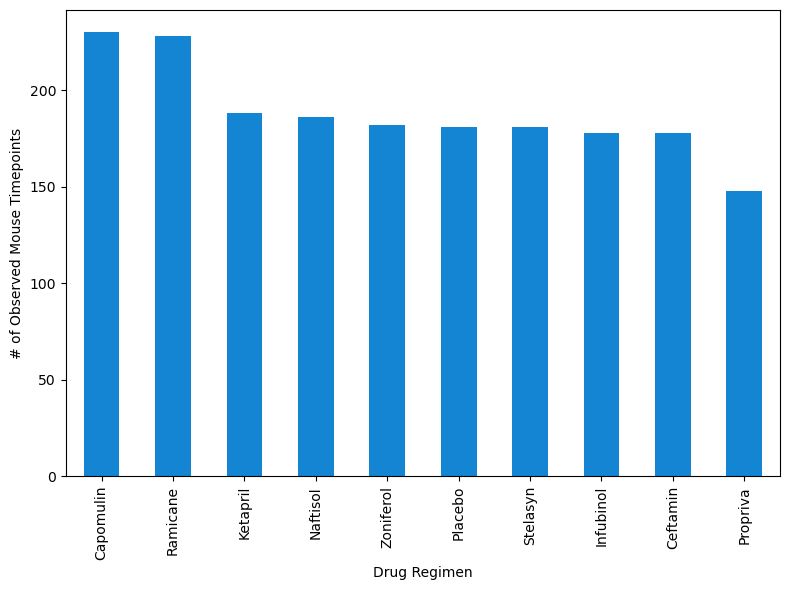

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
data_pd = CleanMouseData_df["Drug Regimen"].value_counts()
figure1 = data_pd.plot(
    kind="bar",
    facecolor="#067FD0",
    figsize=(8, 6),
    xlabel="Drug Regimen",
    ylabel="# of Observed Mouse Timepoints",
    alpha=0.95,
)
plt.tight_layout()
plt.show()

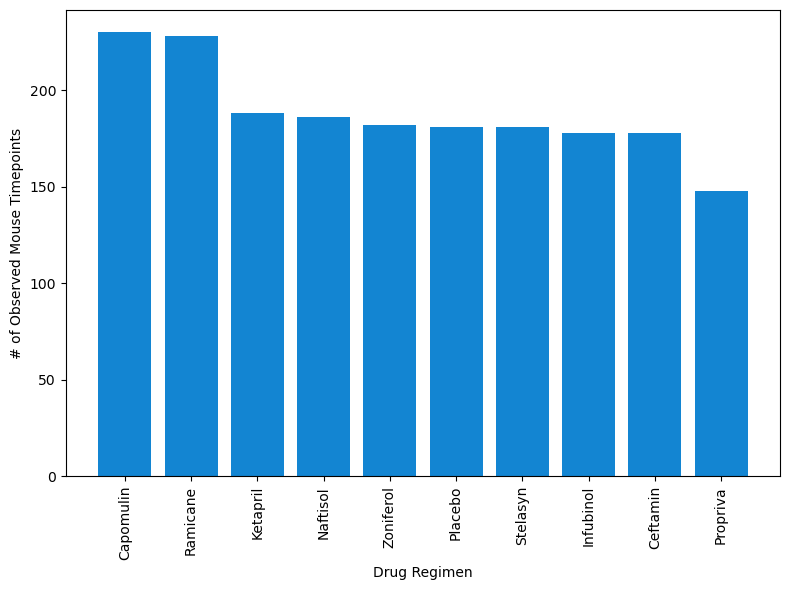

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
data_y = CleanMouseData_df["Drug Regimen"].value_counts()
data_x = data_y.index
plt.figure(figsize=(8, 6))
plt.bar(data_x, data_y, color="#067FD0", alpha=0.95, align="center")
plt.xticks(data_x, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.tight_layout()
plt.show()

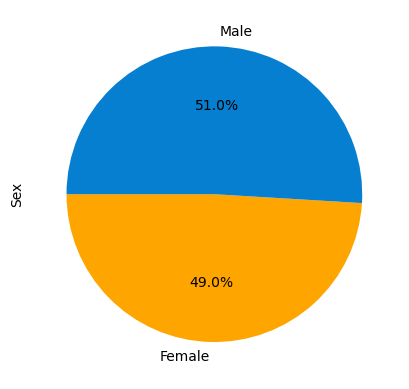

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
PD_Mouse_Sex = (CleanMouseData_df.groupby("Sex")["Sex"].count().plot(kind="pie",y="Sex",labels=["Female", "Male"],explode=(0, 0),autopct="%1.1f%%",colors=["Orange", "#067FD0"],startangle=180))

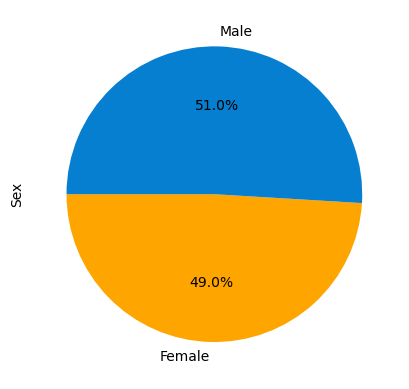

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(CleanMouseData_df.groupby("Sex")["Sex"].count(), labels=["Female", "Male"],explode=(0, 0), autopct="%1.1f%%", colors=["Orange", "#067FD0"], startangle=180)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Max_Timepoint = CleanMouseData_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Merged_df = pd.merge(Max_Timepoint, CleanMouseData_df, how="left", on=["Mouse ID", "Timepoint"])


In [14]:
treatment = []
for x in Merged_df["Drug Regimen"]:
    if x not in treatment:
        treatment.append(x)

drug = Merged_df["Drug Regimen"]
volume = Merged_df["Tumor Volume (mm3)"]
Vol_Capomulin = []
Vol_Ramicane = []
Vol_Infubinol = []
Vol_Ceftamin = []

for i in range(0, len(drug)):
    if drug[i] == "Capomulin":
        Vol_Capomulin.append(volume[i])
    elif drug[i] == "Ramicane":
        Vol_Ramicane.append(volume[i])
    elif drug[i] == "Infubinol":
        Vol_Infubinol.append(volume[i])
    elif drug[i] == "Ceftamin":
        Vol_Ceftamin.append(volume[i])

Vol_Capomulin.sort()
Vol_Ramicane.sort()
Vol_Infubinol.sort()
Vol_Ceftamin.sort()

Drug_Volume = pd.DataFrame(
    {
        "Capomulin": Vol_Capomulin,
        "Ramicane": Vol_Ramicane,
        "Infubinol": Vol_Infubinol,
        "Ceftamin": Vol_Ceftamin,
    }
)

lowerq = Drug_Volume.quantile(0.25)
upperq = Drug_Volume.quantile(0.75)
median = Drug_Volume.quantile(0.5)
iqr = upperq - lowerq
lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)

outlier_Capo_lower = Drug_Volume.loc[Drug_Volume["Capomulin"] < lower_bound[0]]
outlier_Capo_upper = Drug_Volume.loc[Drug_Volume["Capomulin"] > upper_bound[0]]

outlier_Rami_lower = Drug_Volume.loc[Drug_Volume["Ramicane"] < lower_bound[1]]
outlier_Rami_upper = Drug_Volume.loc[Drug_Volume["Ramicane"] > upper_bound[1]]

outlier_Infub_lower = Drug_Volume.loc[Drug_Volume["Infubinol"] < lower_bound[2]]
outlier_Infub_upper = Drug_Volume.loc[Drug_Volume["Infubinol"] > upper_bound[2]]

outlier_Ceft_lower = Drug_Volume.loc[Drug_Volume["Ceftamin"] < lower_bound[3]]
outlier_Ceft_upper = Drug_Volume.loc[Drug_Volume["Ceftamin"] > upper_bound[3]]

Capomulin_outlier = [
    outlier_Capo_lower["Capomulin"],
    outlier_Capo_upper["Capomulin"],
]
print("Capomulin's potential outliers:", Capomulin_outlier)

Ramicane_outlier = [
    outlier_Rami_lower["Ramicane"],
    outlier_Rami_upper["Ramicane"],
]
print("Ramicane's potential outliers:", Ramicane_outlier)

Infubinol_outlier = [
    outlier_Infub_lower["Infubinol"],
    outlier_Infub_upper["Infubinol"],
]
print("Infubinol's potential outliers:", Infubinol_outlier)

Ceftamin_outlier = [
    outlier_Ceft_lower["Ceftamin"],
    outlier_Ceft_upper["Ceftamin"],
]
print("Ceftamin's potential outliers:", Ceftamin_outlier)


Capomulin's potential outliers: [Series([], Name: Capomulin, dtype: float64), Series([], Name: Capomulin, dtype: float64)]
Ramicane's potential outliers: [Series([], Name: Ramicane, dtype: float64), Series([], Name: Ramicane, dtype: float64)]
Infubinol's potential outliers: [0    36.321346
Name: Infubinol, dtype: float64, Series([], Name: Infubinol, dtype: float64)]
Ceftamin's potential outliers: [Series([], Name: Ceftamin, dtype: float64), Series([], Name: Ceftamin, dtype: float64)]


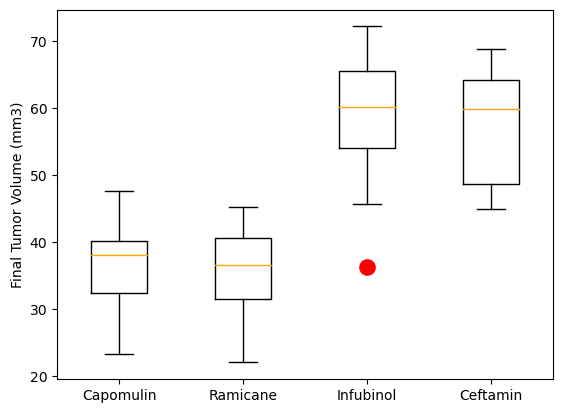

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxprops = dict(linestyle='-', linewidth=1, color='black')
flierprops = dict(marker='o', markerfacecolor='red', markersize=12,
                  markeredgecolor='none')
medianprops = dict(linestyle='-', linewidth=1, color='orange')
whiskerprops = dict(linestyle='-', linewidth=1, color='black')
Volume_Distr = Drug_Volume.boxplot(
    column=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"],
    fontsize=10,
    grid=False,
    boxprops=boxprops,
    flierprops=flierprops,
    medianprops=medianprops,
    whiskerprops =whiskerprops,
)
Volume_Distr.plot()
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

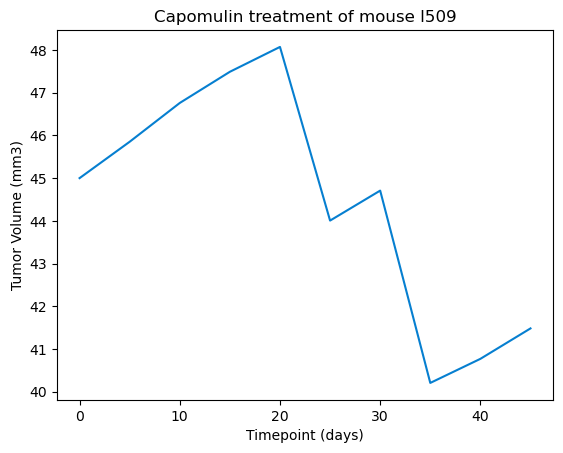

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_Treatment = plt.plot(
    CleanMouseData_df.loc[CleanMouseData_df["Mouse ID"] == "l509"]["Timepoint"],
    CleanMouseData_df.loc[CleanMouseData_df["Mouse ID"] == "l509"][
        "Tumor Volume (mm3)"
    ],
    color="#067FD0",
)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()

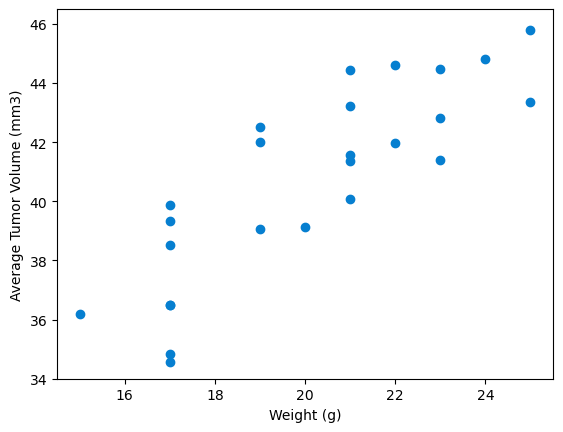

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Tumor_Cap = CleanMouseData_df.loc[CleanMouseData_df["Drug Regimen"] == "Capomulin"]
x_axis = Tumor_Cap.groupby("Mouse ID")["Weight (g)"].mean()
y_axis = Tumor_Cap.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
plt.scatter(x_axis, y_axis,c="#067FD0")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.ylim(34, 46.5)
plt.show()

## Correlation and Regression

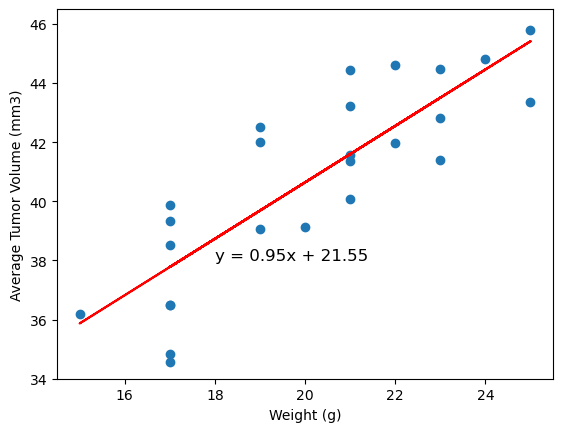

The correlation between mouse weight and the average tumor volume is: 0.84


In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = np.asarray(x_axis)
y_values = np.asarray(y_axis)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (18, 38), fontsize=12, color="black")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.ylim(34, 46.5)
plt.show()
r_1, p_1 = st.pearsonr(x_values, y_values)
print(
    f"The correlation between mouse weight and the average tumor volume is: {rvalue:.2f}"
)